In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the acute nephritis dataset loaded below and analyze the model generated for this datasett.

In [2]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

<IPython.core.display.Javascript object>

In [3]:
# columns:
# Temperature of patient { 35C-42C }
# Occurrence of nausea { yes, no }
# Lumbar pain { yes, no }
# Urine pushing (continuous need for urination) { yes, no }
# Micturition pains { yes, no }
# Burning of urethra, itch, swelling of urethra outlet { yes, no }
# decision: Nephritis of renal pelvis origin { yes, no }

cols = [
    "temp",
    "nausea",
    "lumbar_pain",
    "urine_pushing",
    "micturition_pains",
    "burning",
    "nephritis",
]
nephritis = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/acute.csv",
    names=cols,
)

<IPython.core.display.Javascript object>

In [4]:
nephritis.head()

,temp,nausea,lumbar_pain,urine_pushing,micturition_pains,burning,nephritis
35,5,no,yes,no,no,no,no
35,9,no,no,yes,yes,yes,no
35,9,no,yes,no,no,no,no
36,0,no,no,yes,yes,yes,no
36,0,no,yes,no,no,no,no


<IPython.core.display.Javascript object>

First, check for missing data and remove all rows containing missing data

In [5]:
for col in nephritis.columns:
    if col != "temp":
        nephritis[col] = (nephritis[col] == "yes").astype(int)

<IPython.core.display.Javascript object>

In [6]:
nephritis

,temp,nausea,lumbar_pain,urine_pushing,micturition_pains,burning,nephritis
35,5,0,1,0,0,0,0
35,9,0,0,1,1,1,0
35,9,0,1,0,0,0,0
36,0,0,0,1,1,1,0
36,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
41,4,0,1,1,0,1,1
41,5,0,0,0,0,0,0
41,5,1,1,0,1,0,1
41,5,0,1,1,0,1,1


<IPython.core.display.Javascript object>

In [7]:
nephritis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 35 to 41
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   temp               120 non-null    int64
 1   nausea             120 non-null    int64
 2   lumbar_pain        120 non-null    int64
 3   urine_pushing      120 non-null    int64
 4   micturition_pains  120 non-null    int64
 5   burning            120 non-null    int64
 6   nephritis          120 non-null    int64
dtypes: int64(7)
memory usage: 7.5 KB


<IPython.core.display.Javascript object>

To use the data, we must convert all columns to numeric. Do this using the `get_dummies` function for all non-numeric columns.

Note: remember to drop the first value.

Split the data into train and test. Use 20% of the data for our test subset. Use nephritis as the target variable.

In [8]:
X = nephritis.drop(columns=["nephritis"])
y = nephritis["nephritis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)

<IPython.core.display.Javascript object>

Generate a KNN model with k=5 for the dataset.  What is the accuracy score for the train and test subsamples?

In [9]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<IPython.core.display.Javascript object>

In [10]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score, "\n")
print(test_score)

0.9895833333333334 

0.8333333333333334


<IPython.core.display.Javascript object>

Would you say the model overfits? Why or why not? Put your answer in the comment below.

OMG its overfit!

Let's optimize k. Produce a plot with training and testing accuracy for a wide range of k.

In [11]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

<IPython.core.display.Javascript object>

In [12]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score, "\n")
print(test_score)

0.7708333333333334 

0.625


<IPython.core.display.Javascript object>

In [13]:
d = {1: 5, 2: 10, 3: 15}

<IPython.core.display.Javascript object>

In [18]:
k_range = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
train_scores = []
test_scores = []
for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

<IPython.core.display.Javascript object>

In [19]:
test_scores

[0.9166666666666666,
 0.8333333333333334,
 0.7916666666666666,
 0.75,
 0.75,
 0.75,
 0.625,
 0.7083333333333334,
 0.6666666666666666,
 0.625]

<IPython.core.display.Javascript object>

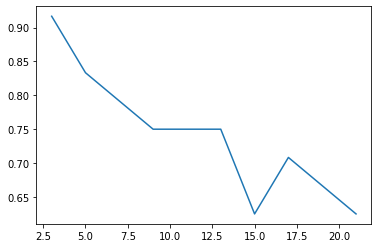

<IPython.core.display.Javascript object>

In [20]:
plt.plot(k_range, test_scores)
plt.show()